### <span style = 'color:green'> Create a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




### Import necessary libraries

In [27]:
# Used for numerical functions
import numpy as np
# used for dataframe
import pandas as pd
# used for drawn a plots
import matplotlib.pyplot as plt
# used for graphs and plots
import seaborn as sns
# used to split the dataset into train, test sets
from sklearn.model_selection import train_test_split
# used for standarizing the dataset
from sklearn.preprocessing import StandardScaler
# modeling the support vector machin
from sklearn.svm import SVC
# evaluate the matrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# used for gridsearch method
from sklearn.model_selection import GridSearchCV
# used to find the receiver operating characteristic and Area under the curve
from sklearn.metrics import roc_auc_score

## 1. Load the dataset

In [28]:
# load the given dataset
df = pd.read_csv('SVM.csv')

# check the first few rows
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [34]:
# check the lats few rows 
df.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
17895,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN
17897,110.679688,38.252642,0.459937,1.690689,4.434783,22.201794,5.939747,39.781374,NaN


In [35]:
df.shape

(17898, 9)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## 2. Missing values should be treated

In [37]:
# check the null values
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       2502
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1702
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     869
target_class                                     5370
dtype: int64

In [38]:
# fill the null values with mean values
df.fillna(df.mean(), inplace=True)

In [39]:
# check the null values
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [40]:
# check the duplicate values
df.duplicated().sum()

0

In [41]:
# Check the unique columns
df.columns.unique()

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [42]:
# Describe the dataset
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,0.990846,6.167913,29.472897,18.590352,4.506092,103.991853,0.241857
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.058809,-0.188572,1.923077,14.806522,5.781506,37.599388,0.000000
50%,115.078125,46.947479,0.291784,0.198710,2.801839,19.645481,8.433515,87.186644,0.000000
75%,127.085938,51.023202,0.480081,0.927783,5.464256,26.605269,10.702959,135.039188,0.092034
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


## 3. Perform Standerdisation and handle outliers

In [43]:
# Standardize the data and handle outliers
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('target_class', axis=1))
# target_class values are continuous so we need to convert categorical values
y = df['target_class']= np.where(df['target_class'] == 1.0, 1, 0)

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# check the shape of the train and test set
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (14318, 8)
X_test shape: (3580, 8)
y_train shape: (14318,)
y_test shape: (3580,)


## 4. perform Support Vector Mchines and tune the model to increase the efficiency of the model

In [46]:
# Train an SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

SVC()

## 5. Predict on the testing set

In [47]:
# Make predictions(y_pred) with X_test
y_pred = svm.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## 6. Evaluation matrics

In [48]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9653631284916201


## 7. Classification report

In [49]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3357
           1       0.70      0.77      0.74       223

    accuracy                           0.97      3580
   macro avg       0.84      0.87      0.86      3580
weighted avg       0.97      0.97      0.97      3580



## 8. Confusion matrix

In [50]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print the confusion matrics
cm

array([[3284,   73],
       [  51,  172]], dtype=int64)

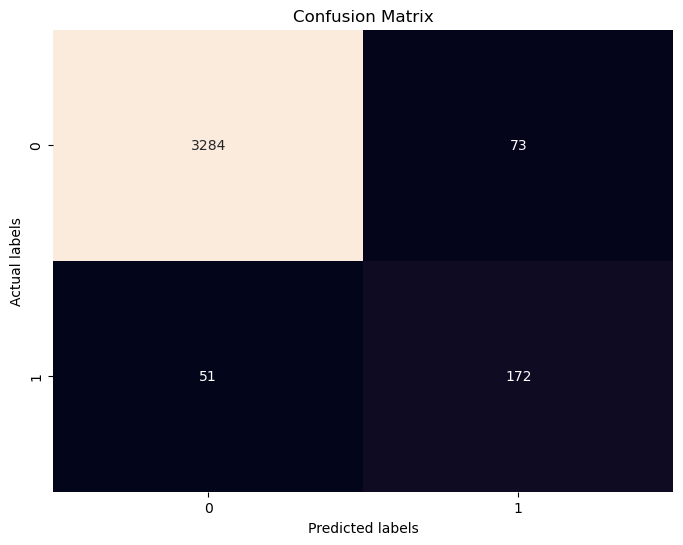

In [51]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Tune hyperparameters using GridSearchCV
# param_grid = {
#    'C': [0.1, 1, 10, 100],
#   'gamma': ['scale', 'auto'],
#    'kernel': ['linear', 'rbf', 'poly']
# grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2)
# grid_search.fit(X_train, y_train)

In [55]:
# Print best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

In [56]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8747774211172424


## 9. Conclusion

-The Support Vector Machine(SVM) model performs well overall, with high accuracy and precision for class 0 (non-pulsar stars).

# Thank You !!!